1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [57]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
import matplotlib.pyplot as plt



In [58]:
df = pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [59]:
le = preprocessing.LabelEncoder()

In [60]:
variety_encoded = le.fit_transform(df["variety"])

In [61]:
print(variety_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [62]:
y = np.array(variety_encoded)
X = df[["sepal.length","sepal.width","petal.length","petal.width"]]
X = np.array(X)

In [63]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


### k = 3

In [64]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1,
       0, 2, 0, 1, 1, 1, 1, 0])

In [65]:
predicted = model.predict([[15.7,2.8,9.5,0.1]])
print(predicted)

[2]


In [66]:
predicted = model.predict([[1.7,3.8,4.5,11.3]])
print(predicted)

[2]


In [67]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


### K = 7

In [68]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1,
       0, 2, 0, 1, 1, 1, 1, 0])

In [69]:
predicted = model.predict([[15.7,2.8,9.5,0.1]])
print(predicted)

[2]


In [70]:
predicted = model.predict([[1.7,3.8,4.5,11.3]])
print(predicted)

[2]


In [71]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


([<matplotlib.axis.XTick at 0x2a12001ec88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

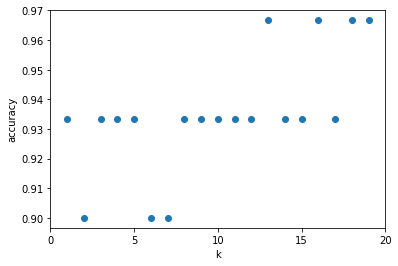

In [72]:
k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [73]:
scores

{1: 0.9333333333333333,
 2: 0.9,
 3: 0.9333333333333333,
 4: 0.9333333333333333,
 5: 0.9333333333333333,
 6: 0.9,
 7: 0.9,
 8: 0.9333333333333333,
 9: 0.9333333333333333,
 10: 0.9333333333333333,
 11: 0.9333333333333333,
 12: 0.9333333333333333,
 13: 0.9666666666666667,
 14: 0.9333333333333333,
 15: 0.9333333333333333,
 16: 0.9666666666666667,
 17: 0.9333333333333333,
 18: 0.9666666666666667,
 19: 0.9666666666666667}

### Ahora probamos con un 60% de los datos

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

([<matplotlib.axis.XTick at 0x2a11fa46388>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

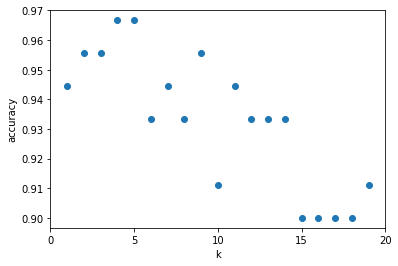

In [75]:
k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [76]:
scores

{1: 0.9444444444444444,
 2: 0.9555555555555556,
 3: 0.9555555555555556,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9333333333333333,
 7: 0.9444444444444444,
 8: 0.9333333333333333,
 9: 0.9555555555555556,
 10: 0.9111111111111111,
 11: 0.9444444444444444,
 12: 0.9333333333333333,
 13: 0.9333333333333333,
 14: 0.9333333333333333,
 15: 0.9,
 16: 0.9,
 17: 0.9,
 18: 0.9,
 19: 0.9111111111111111}

### Eliminamos la clase SETOSA

In [77]:
df = df.drop(df[df["variety"]=="Setosa"].index)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


([<matplotlib.axis.XTick at 0x2a11faebdc8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

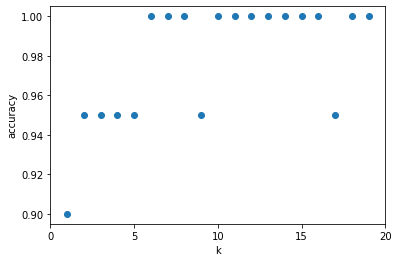

In [78]:
variety_encoded = le.fit_transform(df["variety"])
y = np.array(variety_encoded)
X = df[["sepal.length","sepal.width","petal.length","petal.width"]]
X = np.array(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [79]:
scores

{1: 0.9,
 2: 0.95,
 3: 0.95,
 4: 0.95,
 5: 0.95,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 0.95,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 0.95,
 18: 1.0,
 19: 1.0}